<a href="https://colab.research.google.com/github/juanfra68/IA_bigData/blob/main/Tarea_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
# print(X)
#print(iris.target)
y = (iris.target == 0).astype(int)  # 1 si es "setosa", 0 de lo contrario
#y = iris.target
print(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística (clasificación binaria)
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy: 1.0
Confusion Matrix:
[[20  0]
 [ 0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



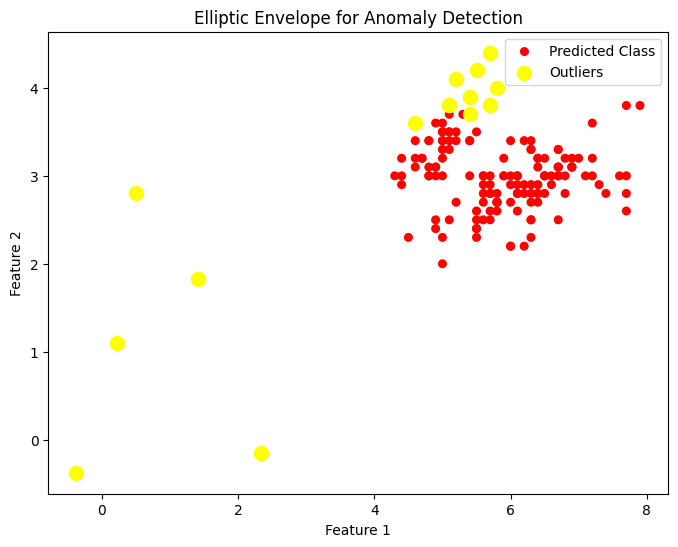

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Introducir algunas anomalías artificialmente
np.random.seed(42)
outliers = np.random.uniform(low=-1, high=3, size=(5, 4))  # Crear 5 instancias anómalas
X_with_outliers = np.vstack([X, outliers])
y_with_outliers = np.concatenate([y, np.ones(5)])  # 1 indica anomalía

# Entrenar el modelo de Elliptic Envelope
envelope = EllipticEnvelope(contamination=0.1)  # Establecer la tasa de contaminación
envelope.fit(X_with_outliers)

# Predecir si cada instancia es normal (inlier) o una anomalía (outlier)
predictions = envelope.predict(X_with_outliers)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
colors = np.array(['blue', 'red'])
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], color=colors[(predictions + 1) // 2], s=30, label='Predicted Class')

# Resaltar instancias anómalas
outliers_index = np.where(predictions == -1)[0]
plt.scatter(X_with_outliers[outliers_index, 0], X_with_outliers[outliers_index, 1], color='yellow', s=100, label='Outliers')

plt.title('Elliptic Envelope for Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Accuracy: 1.0


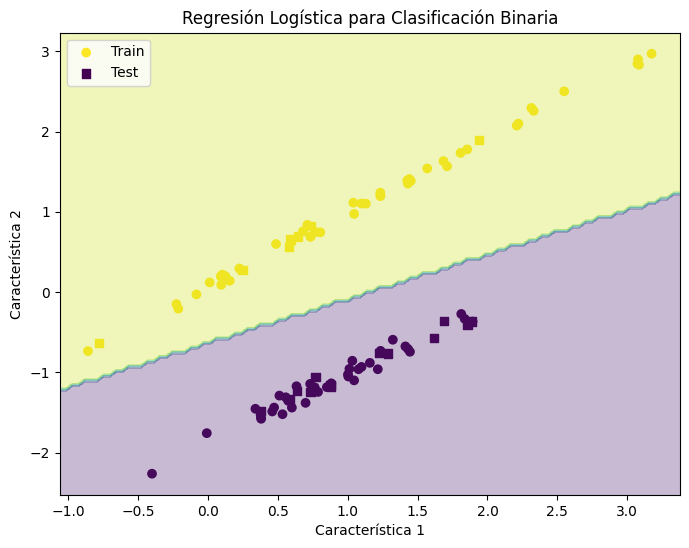

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos sintético para clasificación binaria
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el clasificador de Regresión Logística
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Crear una gráfica para visualizar la clasificación
plt.figure(figsize=(8, 6))

# Plot de puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Train')

# Plot de puntos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='s', label='Test')

# Crear una malla para la visualización de la frontera de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar la frontera de decisión
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# Etiquetas y título
plt.title('Regresión Logística para Clasificación Binaria')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para un mejor rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y entrenar el clasificador SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# No podemos visualizar un modelo de clasificación lineal en un conjunto de datos Iris tridimensional en una gráfica.
# Sin embargo, podemos visualizar las predicciones en una matriz de confusión.

from sklearn.metrics import plot_confusion_matrix

# Visualizar la matriz de confusión
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=iris.target_names)
plt.title('Matriz de Confusión')
plt.show()


Accuracy: 1.0


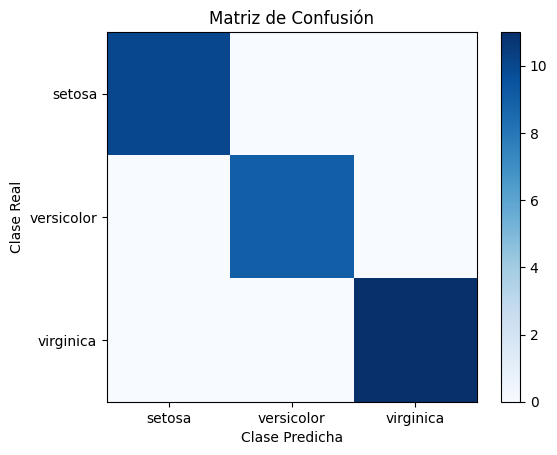

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para un mejor rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y entrenar el clasificador de Regresión Logística
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar la matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy: 0.9


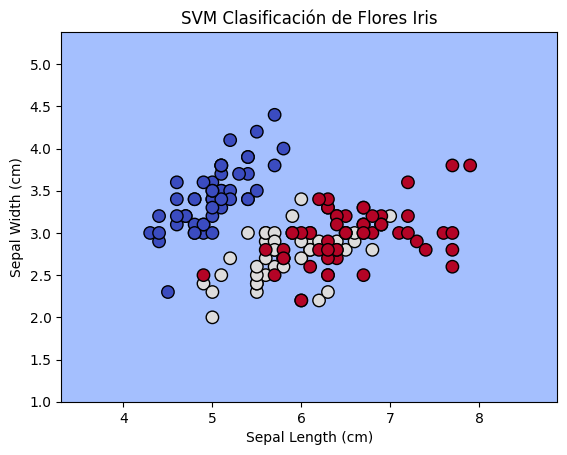

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
# print(iris)
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para la visualización
# print(X)
y = iris.target
print(y)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para un mejor rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y entrenar el clasificador SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Crear una gráfica para visualizar la clasificación en el conjunto de entrenamiento
h = .02  # Tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar la clasificación
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=80)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Clasificación de Flores Iris')
plt.show()

